In [13]:
import pandas as pd
pd.set_option('display.max.columns',None)    # display all columns
nba = pd.read_csv('nbaallelo.csv')
# nba.info()

In [23]:
nba[nba['team_id']=='LAL'] 

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
9730,4866,196010190CIN,NBA,1,1961,10/19/1960,1,0,LAL,Lakers,123,1472.1079,1456.2350,35.369419,CIN,Kings,140,1349.7457,1365.6187,A,L,0.532137,NaN
9739,4870,196010220STL,NBA,1,1961,10/22/1960,2,0,LAL,Lakers,96,1456.2350,1450.4137,34.771576,STL,Hawks,112,1556.3074,1562.1287,A,L,0.240177,NaN
9744,4873,196010240LAL,NBA,0,1961,10/24/1960,3,0,LAL,Lakers,101,1450.4137,1435.3485,33.237518,NYK,Knicks,111,1435.7505,1450.8157,H,L,0.659273,NaN
9747,4874,196010250LAL,NBA,0,1961,10/25/1960,4,0,LAL,Lakers,120,1435.3485,1438.7944,33.586594,NYK,Knicks,118,1450.8157,1447.3698,H,W,0.619308,NaN
9756,4879,196010280GSW,NBA,1,1961,10/28/1960,5,0,LAL,Lakers,120,1438.7944,1437.4066,33.445869,PHW,Warriors,122,1608.6340,1610.0219,A,L,0.174607,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126016,63009,201504080DEN,NBA,1,2015,4/8/2015,78,0,LAL,Lakers,101,1313.7802,1307.5118,21.921890,DEN,Nuggets,119,1415.0565,1421.3248,A,L,0.238914,NaN
126052,63027,201504100LAL,NBA,0,2015,4/10/2015,79,0,LAL,Lakers,106,1307.5118,1312.9532,22.371969,MIN,Timberwolves,98,1283.9249,1278.4835,H,W,0.670716,NaN
126086,63044,201504120LAL,NBA,0,2015,4/12/2015,80,0,LAL,Lakers,106,1312.9532,1305.9197,21.791288,DAL,Mavericks,120,1556.2162,1563.2498,H,L,0.304769,NaN
126115,63058,201504130SAC,NBA,1,2015,4/13/2015,81,0,LAL,Lakers,92,1305.9197,1301.3918,21.422607,SAC,Kings,102,1395.6000,1400.1278,A,L,0.251263,NaN


In [67]:
nba[nba['team_id']=='BOS'].groupby('year_id')['pts'].describe()

,count,mean,std,min,25%,50%,75%,max
year_id,,,,,,,,
1947,60.0,60.083333,9.283285,43.0,53.75,58.5,67.25,82.0
1948,51.0,69.215686,10.100126,48.0,62.00,69.0,75.00,92.0
1949,60.0,76.550000,11.330811,54.0,68.00,75.0,83.25,108.0
1950,68.0,79.691176,10.101363,47.0,73.00,79.0,86.00,106.0
1951,71.0,84.901408,10.880067,54.0,78.00,84.0,93.00,112.0
...,...,...,...,...,...,...,...,...
2011,91.0,96.318681,11.572841,71.0,87.00,96.0,105.00,122.0
2012,86.0,91.302326,10.299137,71.0,85.25,91.0,100.00,115.0
2013,87.0,95.540230,11.321727,71.0,88.00,96.0,103.00,120.0


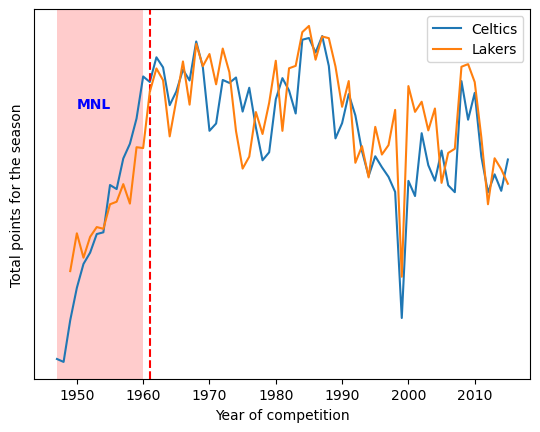

In [34]:
import matplotlib.pyplot as plt
nba[nba['team_id']=='BOS'].groupby('year_id')['pts'].sum().plot(label = "Celtics")
plt.axvline(x=1961, ls='--', c='r')
nba[nba['fran_id']=='Lakers'].groupby('year_id')['pts'].sum().plot(label = "Lakers")
ax = plt.gca()
plt.xlabel("Year of competition")
ax.axes.yaxis.set_ticks([])
plt.ylabel("Total points for the season")
plt.axvspan(xmin=1947, xmax=1960, facecolor='r', alpha=0.2) # 垂直x轴
plt.text(1950, 10000, 'MNL', weight='bold', color='b');
plt.title("")
plt.legend()
# ax.axes.xaxis.set_visible(False)
# ax.axes.yaxis.set_visible(False)

In [52]:
#主，客场胜场 
#
h_w = len(nba[(nba['game_location']=='H')&(nba['pts']>nba['opp_pts'])][['pts','opp_pts']])
h_l = len(nba[(nba['game_location']=='H')&(nba['pts']<nba['opp_pts'])][['pts','opp_pts']])
total_game = h_w+h_l
print(h_w/total_game)
print(h_l/total_game)

0.6225252621242358
0.3774747378757642


In [58]:
h_w = len(nba[(nba['game_location']=='H')&(nba['team_id']=='BOS')&(nba['pts']>nba['opp_pts'])][['pts','opp_pts']])
h_l = len(nba[(nba['game_location']=='H')&(nba['team_id']=='BOS')&(nba['pts']<nba['opp_pts'])][['pts','opp_pts']])
print(h_w)
print(h_l)

2161
939


[]

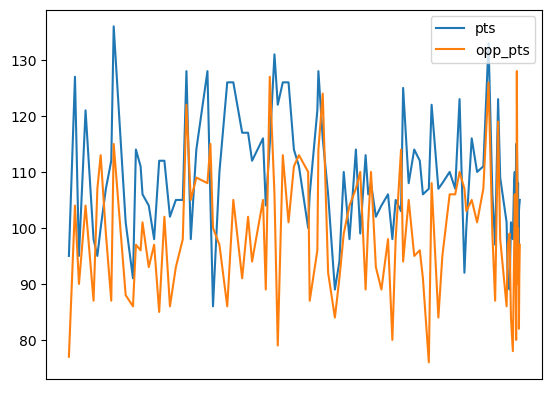

In [65]:
# GSW 2015-2016 
nba[(nba['team_id']=='GSW')&(nba['year_id']==2015)][['pts','opp_pts']].plot()
ax = plt.gca()
ax.axes.xaxis.set_ticks([])